In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to numbers...
q-values estimated...
ranks computed...
features normed...
file ready!


Targets and decoy proportion kept: False, XL and non-XL proportion kept: False
Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 3609, len of negative training set: 33552

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 3970, len of negative training set: 33320

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 4446, len of negative training set: 33290

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 4472, len of negative training set: 33368

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 4727, len of negative training set: 33299

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in 

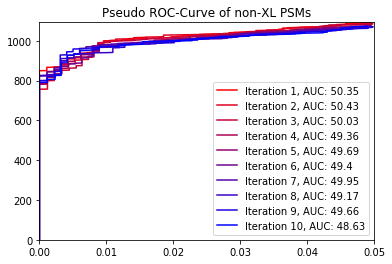

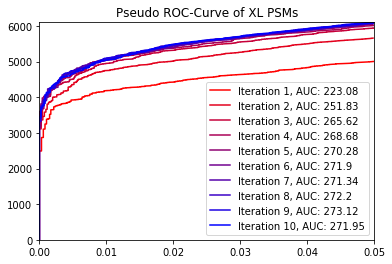

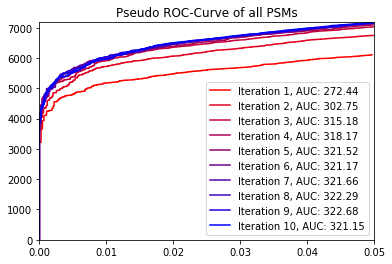

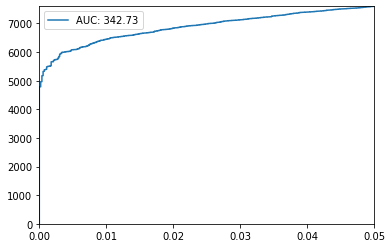

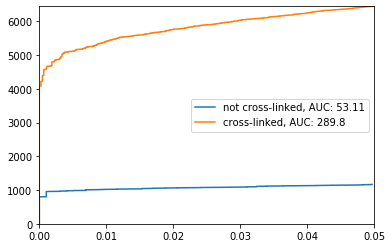

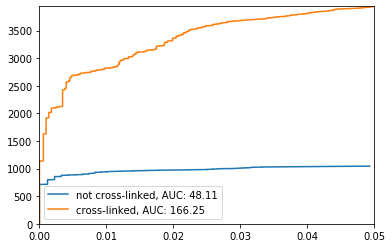

Targets and decoy proportion kept: False, XL and non-XL proportion kept: True
Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 3669, len of negative training set: 33416

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 3894, len of negative training set: 33370

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 4412, len of negative training set: 33298

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 4503, len of negative training set: 33246

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 4773, len of negative training set: 33315

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in it

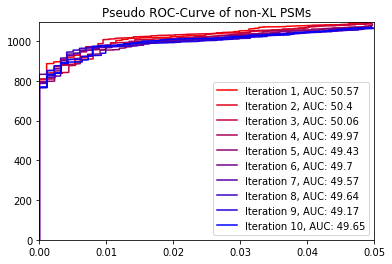

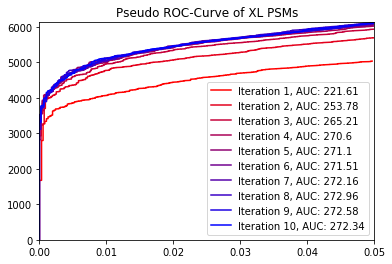

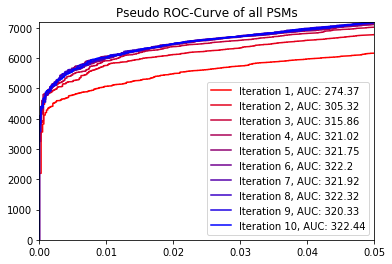

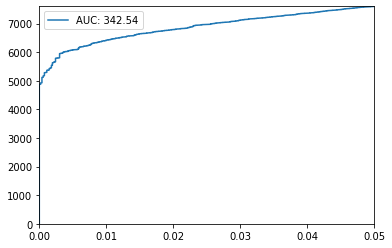

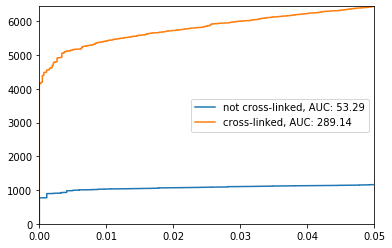

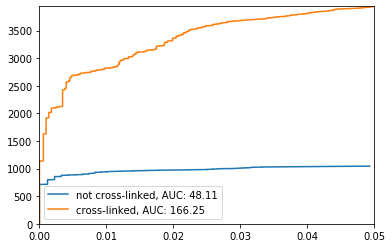

Targets and decoy proportion kept: True, XL and non-XL proportion kept: False
Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 3635, len of negative training set: 33392

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 3936, len of negative training set: 33395

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 4436, len of negative training set: 33299

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 4528, len of negative training set: 33348

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 4841, len of negative training set: 33292

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in it

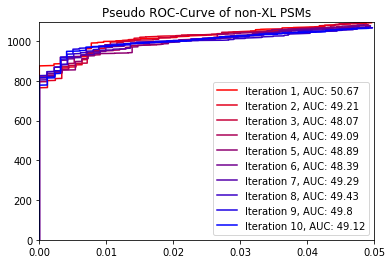

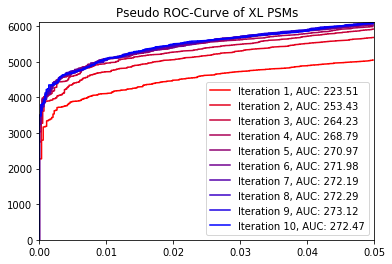

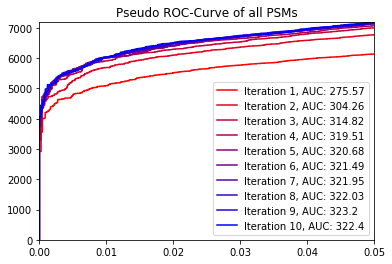

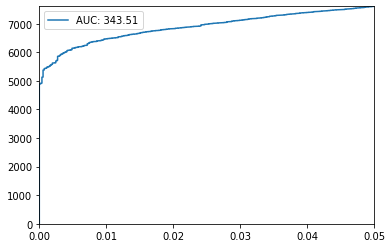

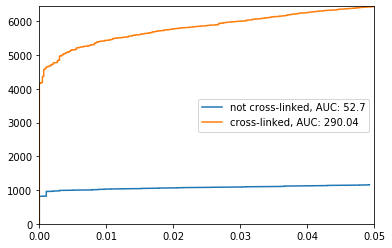

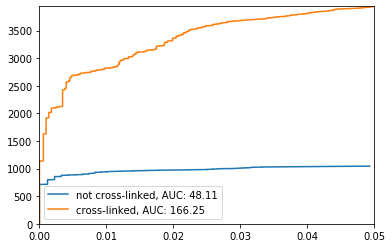

Targets and decoy proportion kept: True, XL and non-XL proportion kept: True
Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 3616, len of negative training set: 33453

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 3985, len of negative training set: 33357

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 4370, len of negative training set: 33380

Optimal parameters are C=10 and class_weight={0: 1, 1: 1}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 4497, len of negative training set: 33307

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 4731, len of negative training set: 33340

Optimal parameters are C=1 and class_weight={0: 1, 1: 1}.
Training in ite

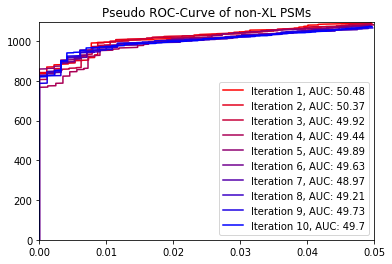

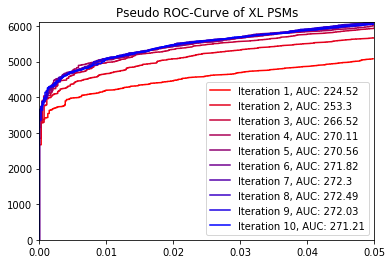

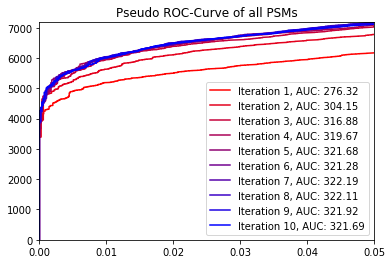

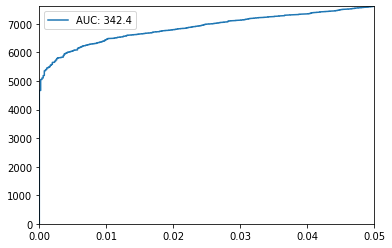

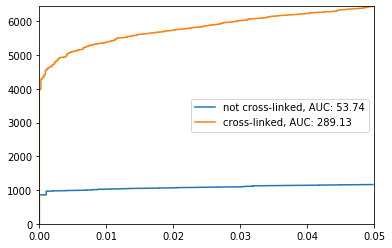

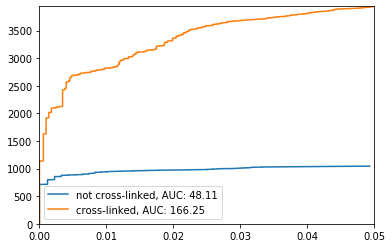

In [2]:
%%time 
for a,b in product([False,True], repeat = 2):
    print('Targets and decoy proportion kept: {}, XL and non-XL proportion kept: {}'.format(a,b))
    p = percolator_experimental(dSlow, idCol, features, plotEveryIter = True, propTarDec = a, propXLnXL = b, plotSaveName = '../results/balancingTest/percolator_acv_{}_TarDec='+str(a)+'_XLprop='+str(b)+'.png')
    
    pseudoROC(p)
    plt.show()
    evalXL(p)
    plt.show()
    evalXL(dSlow)
    plt.show()

342.4011108620026

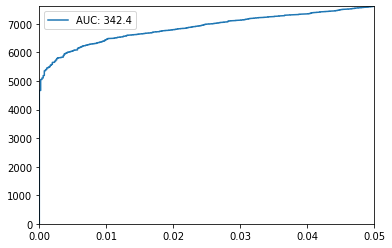

In [3]:
pseudoROC(p)

[53.73503668191135, 289.1263918787534]

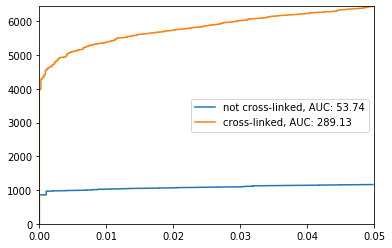

In [4]:
evalXL(p)

[48.105051743546106, 166.24870094745975]

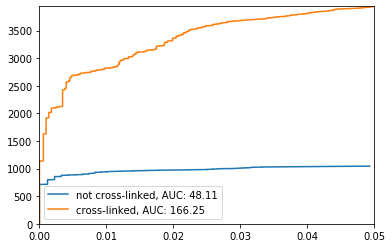

In [5]:
evalXL(dSlow)